### Bases 

#### A Série Histórica de Preços de Combustíveis foi encontrado em: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

#### Petróleo Brent Futuros em: https://br.investing.com/commodities/brent-oil-historical-data

#### USD/BRL - Dólar Americano Real Brasileiro em: https://br.investing.com/currencies/usd-brl-historical-data

#### EUR/BRL - Euro Real Brasileiro em: https://br.investing.com/currencies/eur-brl-historical-data

### Importando bibliotecas

In [1]:
import pandas as pd
from glob import glob
from skimpy import skim
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

### Importando bases

In [2]:
# base fuel_price

file_fuel_price = sorted(glob(r"\Preço_comb\*.csv"))

fuel_price = pd.concat((pd.read_csv(cont, encoding = "latin1", sep = ";", low_memory = False) for cont in file_fuel_price))

fuel_price = fuel_price.loc[(fuel_price["Municipio"] == "JOAO PESSOA")]

fuel_price['Data da Coleta'] = pd.to_datetime(fuel_price["Data da Coleta"], format = "%d/%m/%Y")

fuel_price['Dia_Semana'] = fuel_price['Data da Coleta'].dt.isocalendar().week

fuel_price['Dia_Semana'] = fuel_price['Dia_Semana'].apply(lambda x: str(x))

fuel_price['Ano'] = fuel_price['Data da Coleta'].apply(lambda x: str(x)[:4])

fuel_price['sem_ano'] = fuel_price["Dia_Semana"] + "-" + fuel_price["Ano"]

fuel_price['Valor de Venda'] = fuel_price['Valor de Venda'].str.replace(",", ".")

fuel_price["Valor de Venda"] = pd.to_numeric(fuel_price["Valor de Venda"])

display(fuel_price.head(10))


,ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Regiao - Sigla,Dia_Semana,Ano,sem_ano
4769,NE,PB,JOAO PESSOA,D P N-DISTRIBUIDORA DE PRODUTOS NORDESTINOS LTDA,09.141.763/0005-50,RUA WALFREDO MACEDO BRANDAO,1187,NaN,JARDIM CIDADE UNIVERSITARIA,58052-200,GASOLINA,2020-01-02,4.199,NaN,R$ / litro,BRANCA,NaN,1,2020,1-2020
4770,NE,PB,JOAO PESSOA,D P N-DISTRIBUIDORA DE PRODUTOS NORDESTINOS LTDA,09.141.763/0005-50,RUA WALFREDO MACEDO BRANDAO,1187,NaN,JARDIM CIDADE UNIVERSITARIA,58052-200,ETANOL,2020-01-02,2.990,NaN,R$ / litro,BRANCA,NaN,1,2020,1-2020
4771,NE,PB,JOAO PESSOA,D P N-DISTRIBUIDORA DE PRODUTOS NORDESTINOS LTDA,09.141.763/0005-50,RUA WALFREDO MACEDO BRANDAO,1187,NaN,JARDIM CIDADE UNIVERSITARIA,58052-200,DIESEL S10,2020-01-02,3.690,NaN,R$ / litro,BRANCA,NaN,1,2020,1-2020
4772,NE,PB,JOAO PESSOA,D P N-DISTRIBUIDORA DE PRODUTOS NORDESTINOS LTDA,09.141.763/0005-50,RUA WALFREDO MACEDO BRANDAO,1187,NaN,JARDIM CIDADE UNIVERSITARIA,58052-200,GNV,2020-01-02,3.719,NaN,R$ / mÂ³,BRANCA,NaN,1,2020,1-2020
4773,NE,PB,JOAO PESSOA,D P N-DISTRIBUIDORA DE PRODUTOS NORDESTINOS LTDA,09.141.763/0003-99,RUA JOAO RODRIGUES ALVES,185,NaN,BANCARIOS,58051-000,GASOLINA,2020-01-02,4.199,"3,92",R$ / litro,BRANCA,NaN,1,2020,1-2020
4774,NE,PB,JOAO PESSOA,D P N-DISTRIBUIDORA DE PRODUTOS NORDESTINOS LTDA,09.141.763/0003-99,RUA JOAO RODRIGUES ALVES,185,NaN,BANCARIOS,58051-000,ETANOL,2020-01-02,2.990,"2,6",R$ / litro,BRANCA,NaN,1,2020,1-2020
4775,NE,PB,JOAO PESSOA,D P N-DISTRIBUIDORA DE PRODUTOS NORDESTINOS LTDA,09.141.763/0003-99,RUA JOAO RODRIGUES ALVES,185,NaN,BANCARIOS,58051-000,DIESEL S10,2020-01-02,3.690,"3,41",R$ / litro,BRANCA,NaN,1,2020,1-2020
4776,NE,PB,JOAO PESSOA,BSB BANCARIOS COMERCIAL DE COMBUSTIVEIS LTDA,07.176.121/0001-38,RUA WALFREDO MACEDO BRANDAO,675,JARD C UNIVERSITARIA,BANCARIOS,58052-000,GASOLINA,2020-01-02,4.190,NaN,R$ / litro,RAIZEN,NaN,1,2020,1-2020
4777,NE,PB,JOAO PESSOA,BSB BANCARIOS COMERCIAL DE COMBUSTIVEIS LTDA,07.176.121/0001-38,RUA WALFREDO MACEDO BRANDAO,675,JARD C UNIVERSITARIA,BANCARIOS,58052-000,ETANOL,2020-01-02,2.890,NaN,R$ / litro,RAIZEN,NaN,1,2020,1-2020
4778,NE,PB,JOAO PESSOA,BSB BANCARIOS COMERCIAL DE COMBUSTIVEIS LTDA,07.176.121/0001-38,RUA WALFREDO MACEDO BRANDAO,675,JARD C UNIVERSITARIA,BANCARIOS,58052-000,DIESEL,2020-01-02,3.659,NaN,R$ / litro,RAIZEN,NaN,1,2020,1-2020


In [3]:
# base brent_price

file_brent_price = sorted(glob(r"\Preço_pet_brent\*.csv"))

brent_price = pd.concat((pd.read_csv(cont, encoding = "utf-8", sep = ",", low_memory = False) for cont in file_brent_price))

brent_price['Data'] = brent_price['Data'].str.replace(".", "/")

brent_price['Data'] = pd.to_datetime(brent_price["Data"], format = "%d/%m/%Y")

brent_price['Dia_Semana'] = brent_price['Data'].dt.isocalendar().week

brent_price['Dia_Semana'] = brent_price['Dia_Semana'].apply(lambda x: str(x))

brent_price['Ano'] = brent_price['Data'].apply(lambda x: str(x)[:4])

brent_price['sem_ano'] = brent_price["Dia_Semana"] + "-" + brent_price["Ano"]

brent_price['Último'] = brent_price['Último'].str.replace(",", ".")

brent_price["Último"] = pd.to_numeric(brent_price["Último"])

display(brent_price.head(10))

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Dia_Semana,Ano,sem_ano
0,2023-06-30,74.90,"74,22","75,40","74,21","14,70K","0,75%",26,2023,26-2023
1,2023-06-29,74.34,"73,72","74,98","73,39","72,87K","0,42%",26,2023,26-2023
2,2023-06-28,74.03,"72,62","74,20","71,57","91,45K","2,45%",26,2023,26-2023
3,2023-06-27,72.26,"74,28","74,90","72,08","161,15K","-2,59%",26,2023,26-2023
4,2023-06-26,74.18,"74,50","74,85","73,42","150,17K","0,45%",26,2023,26-2023
5,2023-06-23,73.85,"74,02","74,44","72,11","169,54K","-0,39%",25,2023,25-2023
6,2023-06-22,74.14,"77,03","77,20","73,59","329,53K","-3,86%",25,2023,25-2023
7,2023-06-21,77.12,"75,54","77,24","75,52","236,55K","1,61%",25,2023,25-2023
8,2023-06-20,75.90,"76,12","77,15","74,51","276,38K","-0,25%",25,2023,25-2023
9,2023-06-19,76.09,"76,40","76,93","75,34","141,42K","-0,68%",25,2023,25-2023


In [4]:
# base dolar_price

file_dolar_price = sorted(glob(r"\Preço_dolar\*.csv"))

dolar_price = pd.concat((pd.read_csv(cont, encoding = "utf-8", sep = ",", low_memory = False) for cont in file_dolar_price))

dolar_price['Data'] = dolar_price['Data'].str.replace(".", "/")

dolar_price['Data'] = pd.to_datetime(dolar_price["Data"], format = "%d/%m/%Y")

dolar_price['Dia_Semana'] = dolar_price['Data'].dt.isocalendar().week

dolar_price['Dia_Semana'] = dolar_price['Dia_Semana'].apply(lambda x: str(x))

dolar_price['Ano'] = dolar_price['Data'].apply(lambda x: str(x)[:4])

dolar_price['sem_ano'] = dolar_price["Dia_Semana"] + "-" + dolar_price["Ano"]

dolar_price['Último'] = dolar_price['Último'].str.replace(",", ".")

dolar_price["Último"] = pd.to_numeric(dolar_price["Último"])

display(dolar_price.head(10))

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Dia_Semana,Ano,sem_ano
0,2023-06-30,4.7860,"4,8559","4,8709","4,7828",NaN,"-1,43%",26,2023,26-2023
1,2023-06-29,4.8553,"4,8516","4,8750","4,8283",NaN,"0,10%",26,2023,26-2023
2,2023-06-28,4.8506,"4,8121","4,8717","4,8097",NaN,"0,84%",26,2023,26-2023
3,2023-06-27,4.8103,"4,7650","4,8148","4,7505",NaN,"0,90%",26,2023,26-2023
4,2023-06-26,4.7675,"4,7838","4,7870","4,7579",NaN,"-0,39%",26,2023,26-2023
5,2023-06-23,4.7864,"4,7719","4,8073","4,7653",NaN,"0,37%",25,2023,25-2023
6,2023-06-22,4.7689,"4,7648","4,7884","4,7507",NaN,"0,12%",25,2023,25-2023
7,2023-06-21,4.7630,"4,7907","4,8170","4,7624",NaN,"-0,57%",25,2023,25-2023
8,2023-06-20,4.7902,"4,7780","4,8086","4,7734",NaN,"0,27%",25,2023,25-2023
9,2023-06-19,4.7772,"4,8202","4,8320","4,7587",NaN,"-0,89%",25,2023,25-2023


In [5]:
# base euro_price

file_euro_price = sorted(glob(r"\Preço_euro\*.csv"))

euro_price = pd.concat((pd.read_csv(cont, encoding = "utf-8", sep = ",", low_memory = False) for cont in file_euro_price))

euro_price['Data'] = euro_price['Data'].str.replace(".", "/")

euro_price['Data'] = pd.to_datetime(euro_price["Data"], format = "%d/%m/%Y")

euro_price['Dia_Semana'] = euro_price['Data'].dt.isocalendar().week

euro_price['Dia_Semana'] = euro_price['Dia_Semana'].apply(lambda x: str(x))

euro_price['Ano'] = euro_price['Data'].apply(lambda x: str(x)[:4])

euro_price['sem_ano'] = euro_price["Dia_Semana"] + "-" + euro_price["Ano"]

euro_price['Último'] = euro_price['Último'].str.replace(",", ".")

euro_price["Último"] = pd.to_numeric(euro_price["Último"])

display(euro_price.head(10))

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Dia_Semana,Ano,sem_ano
0,2023-06-30,5.2215,"5,2751","5,2894","5,2194",NaN,"-1,01%",26,2023,26-2023
1,2023-06-29,5.2748,"5,2950","5,3085","5,2565",NaN,"-0,33%",26,2023,26-2023
2,2023-06-28,5.2925,"5,2734","5,3254","5,2614",NaN,"0,40%",26,2023,26-2023
3,2023-06-27,5.2716,"5,2027","5,2776","5,1989",NaN,"1,41%",26,2023,26-2023
4,2023-06-26,5.1985,"5,2161","5,2267","5,1915",NaN,"-0,26%",26,2023,26-2023
5,2023-06-23,5.2119,"5,2258","5,2337","5,1758",NaN,"-0,25%",25,2023,25-2023
6,2023-06-22,5.2248,"5,2337","5,2517","5,2193",NaN,"-0,13%",25,2023,25-2023
7,2023-06-21,5.2317,"5,2305","5,2569","5,2164",NaN,"0,06%",25,2023,25-2023
8,2023-06-20,5.2285,"5,2191","5,2485","5,2105",NaN,"0,22%",25,2023,25-2023
9,2023-06-19,5.2172,"5,2743","5,2790","5,1951",NaN,"-1,01%",25,2023,25-2023


### Agrupamentos

In [6]:
# gasoline_price_argupado

gasoline_price = fuel_price.loc[(fuel_price["Produto"] == "GASOLINA")]

gasoline_price_agr = gasoline_price.groupby(["sem_ano"])["Valor de Venda"].mean()

gasoline = pd.DataFrame(gasoline_price_agr)

gasoline = gasoline.reset_index()

gasoline = gasoline.rename(columns={"Valor de Venda": "Price_sem_gasoline"})

gasoline

,sem_ano,Price_sem_gasoline
0,1-2020,4.258600
1,1-2021,4.620333
2,1-2022,6.480000
3,1-2023,4.748750
4,10-2020,4.116375
...,...,...
170,8-2023,4.974737
171,9-2020,4.120292
172,9-2021,4.983067
173,9-2022,6.393333


In [7]:
#brent_price_agrupado

brent_price_agr = brent_price.groupby(["sem_ano"])["Último"].mean()

brent_price_agr = pd.DataFrame(brent_price_agr)

brent_price_agr = brent_price_agr.reset_index()

brent_price_agr = brent_price_agr.rename(columns={"Último": "Price_sem_brent"})

brent_price_agr

,sem_ano,Price_sem_brent
0,1-2020,67.425
1,1-2021,53.872
2,1-2022,80.704
3,1-2023,79.300
4,10-2020,50.030
...,...,...
178,8-2023,82.468
179,9-2020,53.476
180,9-2021,65.312
181,9-2022,109.492


In [8]:
#dolar_price_agrupado

dolar_price_agr = dolar_price.groupby(["sem_ano"])["Último"].mean()

dolar_price_agr = pd.DataFrame(dolar_price_agr)

dolar_price_agr = dolar_price_agr.reset_index()

dolar_price_agr = dolar_price_agr.rename(columns={"Último": "Price_sem_dolar"})

dolar_price_agr

,sem_ano,Price_sem_dolar
0,1-2020,4.037667
1,1-2021,5.344800
2,1-2022,5.677280
3,1-2023,5.370100
4,10-2020,4.561800
...,...,...
179,8-2023,5.166880
180,9-2020,4.437380
181,9-2021,5.659460
182,9-2022,5.102580


In [9]:
#euro_price_agrupado

euro_price_agr = euro_price.groupby(["sem_ano"])["Último"].mean()

euro_price_agr = pd.DataFrame(euro_price_agr)

euro_price_agr = euro_price_agr.reset_index()

euro_price_agr = euro_price_agr.rename(columns={"Último": "Price_sem_euro"})

euro_price_agr

,sem_ano,Price_sem_euro
0,1-2020,4.514067
1,1-2021,6.558700
2,1-2022,6.420060
3,1-2023,5.689400
4,10-2020,5.105460
...,...,...
179,8-2023,5.484080
180,9-2020,4.848420
181,9-2021,6.800420
182,9-2022,5.659620


### Merge

In [10]:
#merge

merg_1 = pd.merge(gasoline, brent_price_agr, left_on="sem_ano", right_on="sem_ano", how="left")

merg_2 = pd.merge(merg_1, dolar_price_agr, left_on="sem_ano", right_on="sem_ano", how="left")

merg_3 = pd.merge(merg_2, euro_price_agr, left_on="sem_ano", right_on="sem_ano", how="left")

merg_3 = merg_3.dropna()

merg_3["Price_sem_brent_ajus"] = merg_3["Price_sem_brent"]*merg_3["Price_sem_dolar"]

#test

x = merg_3

print('Valores nulos somam: \n', x.isna().sum())

display(x)

print(x.info())


Valores nulos somam: 
 sem_ano                 0
Price_sem_gasoline      0
Price_sem_brent         0
Price_sem_dolar         0
Price_sem_euro          0
Price_sem_brent_ajus    0
dtype: int64


,sem_ano,Price_sem_gasoline,Price_sem_brent,Price_sem_dolar,Price_sem_euro,Price_sem_brent_ajus
0,1-2020,4.258600,67.425,4.037667,4.514067,272.239675
1,1-2021,4.620333,53.872,5.344800,6.558700,287.935066
2,1-2022,6.480000,80.704,5.677280,6.420060,458.179205
3,1-2023,4.748750,79.300,5.370100,5.689400,425.848930
4,10-2020,4.116375,50.030,4.561800,5.105460,228.226854
...,...,...,...,...,...,...
170,8-2023,4.974737,82.468,5.166880,5.484080,426.102260
171,9-2020,4.120292,53.476,4.437380,4.848420,237.293333
172,9-2021,4.983067,65.312,5.659460,6.800420,369.630652
173,9-2022,6.393333,109.492,5.102580,5.659620,558.691689


<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 174
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sem_ano               174 non-null    object 
 1   Price_sem_gasoline    174 non-null    float64
 2   Price_sem_brent       174 non-null    float64
 3   Price_sem_dolar       174 non-null    float64
 4   Price_sem_euro        174 non-null    float64
 5   Price_sem_brent_ajus  174 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB
None


### Estatística descritiva

In [11]:
display(merg_3.describe())

,Price_sem_gasoline,Price_sem_brent,Price_sem_dolar,Price_sem_euro,Price_sem_brent_ajus
count,174.000000,174.000000,174.000000,174.000000,174.000000
mean,5.220444,73.486322,5.199250,5.815656,380.888145
std,0.990941,22.935413,0.332058,0.560636,117.345106
min,3.421208,21.608000,4.037667,4.514067,117.613640
25%,4.485625,58.185000,5.085360,5.365145,271.673738
50%,5.173947,75.064000,5.222760,5.758660,385.381841
75%,5.897156,86.534500,5.391305,6.319385,470.999892
max,7.200833,121.748000,5.851140,6.800420,606.565823


### Dados sumarizados

In [12]:
skim(merg_3)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 174    │ │ float64     │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Price_sem_gasoline           │    0 │       0 │    5.2 │   0.99 │   3.4 │   4.5 │   5.9 │    7.2 │ ▃▄█▅▄▃  │  │
│ │ Price_sem_brent              │    0 │       0 │     73 │     23 │    22 │    58 │    87 │    120 │ ▂▄▅█▃▃  │  │
│ │ Price_sem_dolar              │    0 │       0 │    5.2 │   0.33 │     4 │   5.1 │   5.4 │    5.9 │ ▁ ▂█▆▃  │  │
│ │ Price_sem_euro               │    0 │       0 │    5.8 │   0.56 │   4.5 │   5.4 │   6.3 │    6.8 │ ▂▄█▃█▅  │  │
│ │ Price_sem_brent_ajus         │    0 │       0 │    380 │    120 │   120 │   270 │   470 │    610 │ ▂▅▂█▅▂  │  │
│ └──────────────────────────────┴──────┴─────────┴────────┴────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sem_ano                   │       0 │          0 │                            1 │                      174 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Matriz de correlação

<AxesSubplot:>

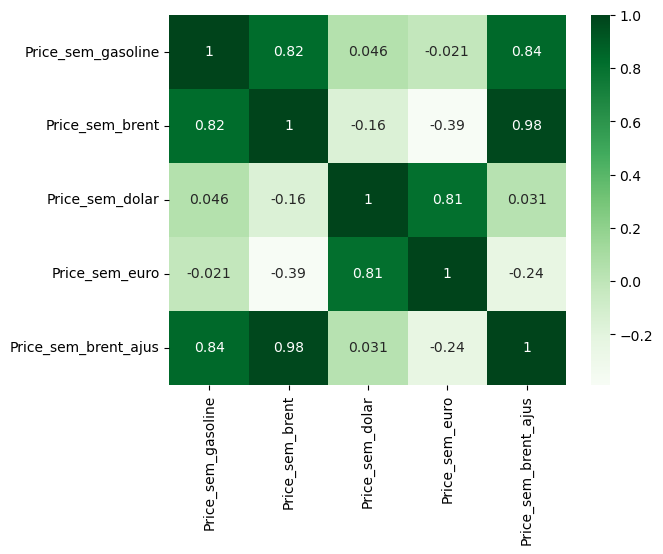

In [13]:
sns.heatmap(merg_3.drop(["sem_ano"], axis = 1).corr(), annot=True, cmap='Greens')

### Modelo de regressão linear - Abordagem Econométrica

In [14]:
modelo_mqo = smf.ols('Price_sem_gasoline ~ Price_sem_brent_ajus + Price_sem_dolar + Price_sem_euro', merg_3)

resultado_mqo = modelo_mqo.fit()

display(resultado_mqo.summary())

print(f'Valores dos parâmetros: \n{resultado_mqo.params}')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price_sem_gasoline   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     228.2
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           2.29e-59
Time:                        22:59:42   Log-Likelihood:                -104.32
No. Observations:                 174   AIC:                             216.6
Df Residuals:                     170   BIC:                             229.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.0659      0.549      5.589      0.000       1.983       4.149
Price_sem_brent_ajus     0.0084      0.000     25.970      0.000       0.008       0.009
Price_sem_dolar         -1.3524      0.187     -7.234      0.000      -1.721      -0.983
Price_sem_euro           1.0300      0.114      9.033      0.000       0.805       1.255
==============================================================================
Omnibus:                        7.711   Durbin-Watson:                   2.613
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.742
Skew:                           0.479   Prob(JB):                       0.0208
Kurtosis:                       2.614   Cond. No.                     6.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Valores dos parâmetros: 
Intercept               3.065883
Price_sem_brent_ajus    0.008391
Price_sem_dolar        -1.352410
Price_sem_euro          1.030003
dtype: float64


### Treinamento dos modelos

In [15]:
#Separando em dados de treino e dados de teste

y = merg_3["Price_sem_gasoline"]
x = merg_3[["Price_sem_brent_ajus", "Price_sem_dolar", "Price_sem_euro"]]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [16]:
modelo_regressaolinear = LinearRegression()

# treina as inteligencias artificias
modelo_regressaolinear.fit(x_treino, y_treino)

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

# aramezenando os erros
erros_regressao = y_teste - previsao_regressaolinear

from scipy.stats import shapiro

# teste de normaliadde Shapiro-Wilk
stat, p = shapiro(erros_regressao)

print('Estatística de teste:', stat)
print('Valor-p:', p)

if p > 0.05:
    print('Para a regressão linear, os erros parecem ser normalmente distribuídos')
else:
    print('Para a regressão linear, os erros não parecem ser normalmente distribuídos')

Estatística de teste: 0.9674362540245056
Valor-p: 0.15611760318279266
Para a regressão linear, os erros parecem ser normalmente distribuídos


Mean Squared Error (MSE) = 0.14884967579074943
Mean Absolute Error (MAE) = 0.3059498581252669
R-squared (R2) = 0.8435768004136235


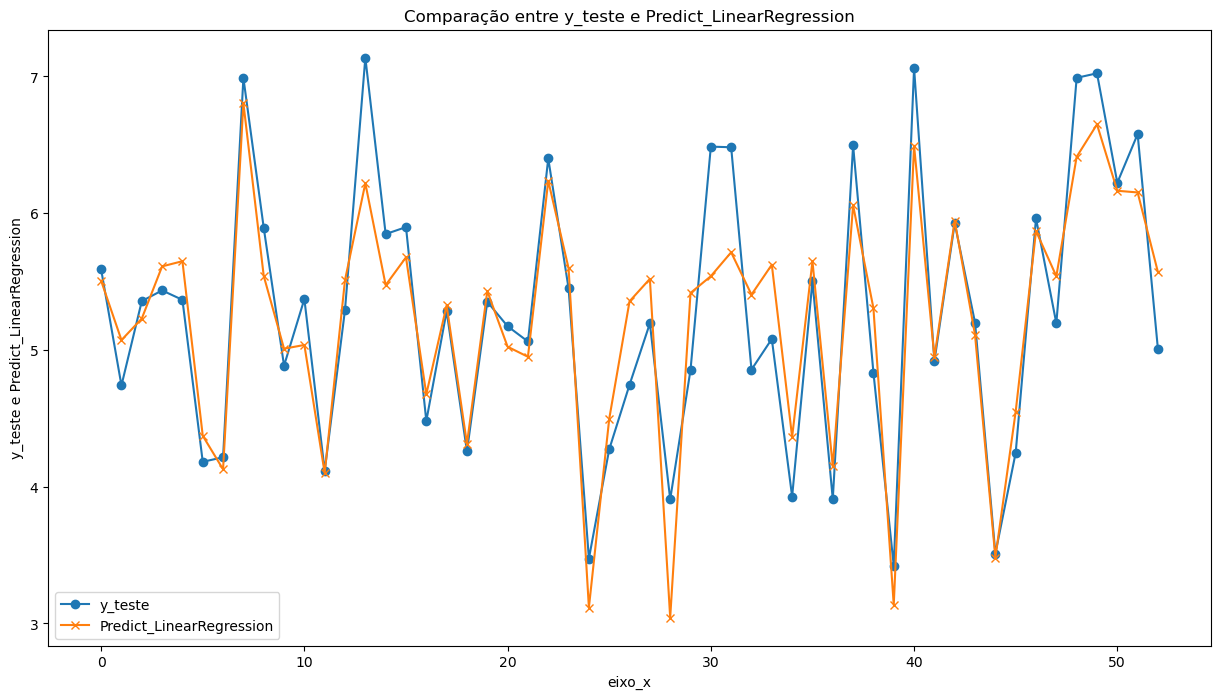

In [17]:
LinearRegression = LinearRegression()
LinearRegression.fit(x_treino, y_treino)

y_LinearRegression = LinearRegression.predict(x_teste)

# Métricas de regressão
mse = mean_squared_error(y_teste, y_LinearRegression)
mae = mean_absolute_error(y_teste, y_LinearRegression)
r2 = r2_score(y_teste, y_LinearRegression)

print('Mean Squared Error (MSE) =', mse)
print('Mean Absolute Error (MAE) =', mae)
print('R-squared (R2) =', r2)

tabela_LinearRegression = pd.DataFrame()
tabela_LinearRegression["y_teste"] = y_teste
tabela_LinearRegression["Predict_LinearRegression"] = y_LinearRegression


# Dados fornecidos
y_teste_ln = tabela_LinearRegression["y_teste"]
Predict_LinearRegression = tabela_LinearRegression["Predict_LinearRegression"]

# Geração de um array de valores para o eixo x
x_vals = np.arange(len(y_teste))

# Criação do gráfico de linhas
plt.figure(figsize=(15, 8))  # Define o tamanho da figura
plt.plot(x_vals, y_teste_ln, label='y_teste', marker='o')
plt.plot(x_vals, Predict_LinearRegression, label='Predict_LinearRegression', marker='x')
#plt.xticks(x_vals, y_test)  # Define os rótulos do eixo x como os valores de y_teste
plt.xlabel('eixo_x')  # Rótulo do eixo x
plt.ylabel('y_teste e Predict_LinearRegression')  # Rótulo do eixo y
plt.title('Comparação entre y_teste e Predict_LinearRegression')  # Título do gráfico
plt.legend()  # Adiciona a legenda
#plt.grid(True)  # Adiciona as grades ao gráfico
plt.show()  # Mostra o gráfico


Mean Squared Error (MSE) = 0.04604213464959734
Mean Absolute Error (MAE) = 0.15699692507220245
R-squared (R2) = 0.9516152253646738


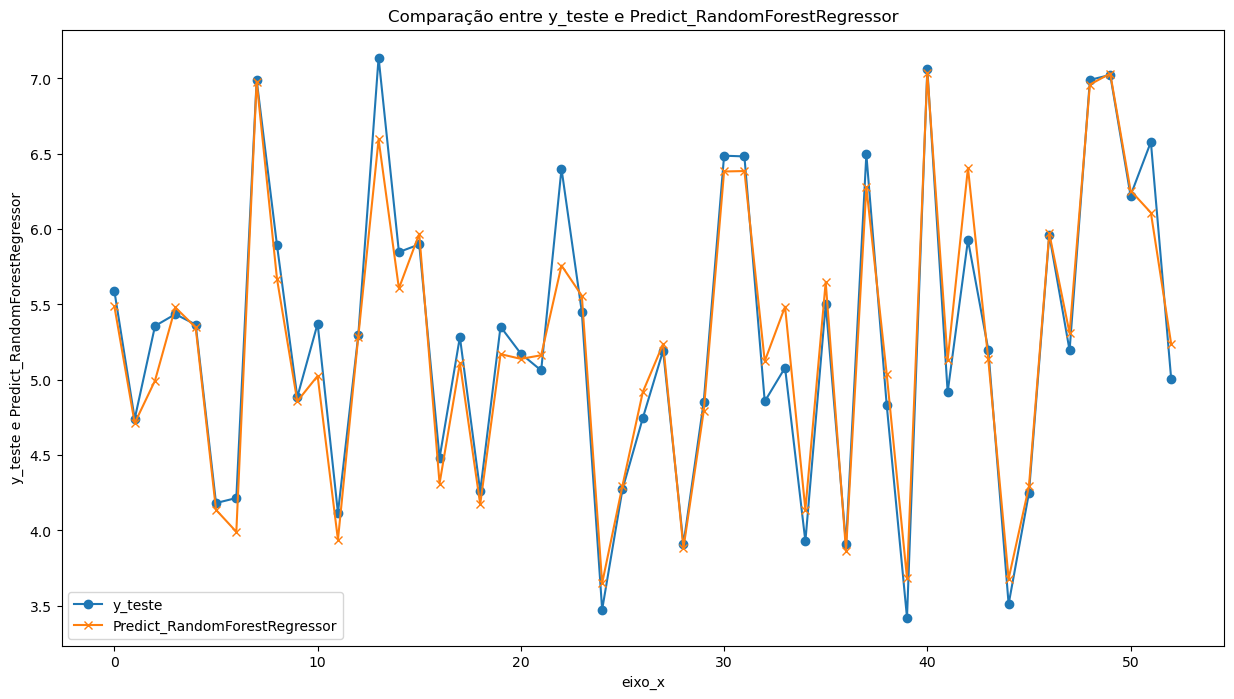

In [18]:
# Crie e ajuste o modelo RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor.fit(x_treino, y_treino)
y_RandomForestRegressor = RandomForestRegressor.predict(x_teste)

# Métricas de regressão
mse = mean_squared_error(y_teste, y_RandomForestRegressor)
mae = mean_absolute_error(y_teste, y_RandomForestRegressor)
r2 = r2_score(y_teste, y_RandomForestRegressor)

print('Mean Squared Error (MSE) =', mse)
print('Mean Absolute Error (MAE) =', mae)
print('R-squared (R2) =', r2)

tabela_RandomForestRegressor = pd.DataFrame()
tabela_RandomForestRegressor["y_teste"] = y_teste
tabela_RandomForestRegressor["Predict_RandomForestRegressor"] = y_RandomForestRegressor

# Dados fornecidos
y_teste_rfr = tabela_RandomForestRegressor["y_teste"]
Predict_RandomForestRegressor = tabela_RandomForestRegressor["Predict_RandomForestRegressor"]

# Geração de um array de valores para o eixo x
x_vals = np.arange(len(y_teste))

# Criação do gráfico de linhas
plt.figure(figsize=(15, 8))  # Define o tamanho da figura
plt.plot(x_vals, y_teste_rfr, label='y_teste', marker='o')
plt.plot(x_vals, Predict_RandomForestRegressor, label='Predict_RandomForestRegressor', marker='x')

#plt.xticks(x_vals, y_test)  # Define os rótulos do eixo x como os valores de y_teste
plt.xlabel('eixo_x')  # Rótulo do eixo x
plt.ylabel('y_teste e Predict_RandomForestRegressor')  # Rótulo do eixo y
plt.title('Comparação entre y_teste e Predict_RandomForestRegressor')  # Título do gráfico
plt.legend()  # Adiciona a legenda
#plt.grid(True)  # Adiciona as grades ao gráfico
plt.show()  # Mostra o gráfico



Mean Squared Error (MSE) = 0.06847941655754958
Mean Absolute Error (MAE) = 0.14906551083943329
R-squared (R2) = 0.928036326670952


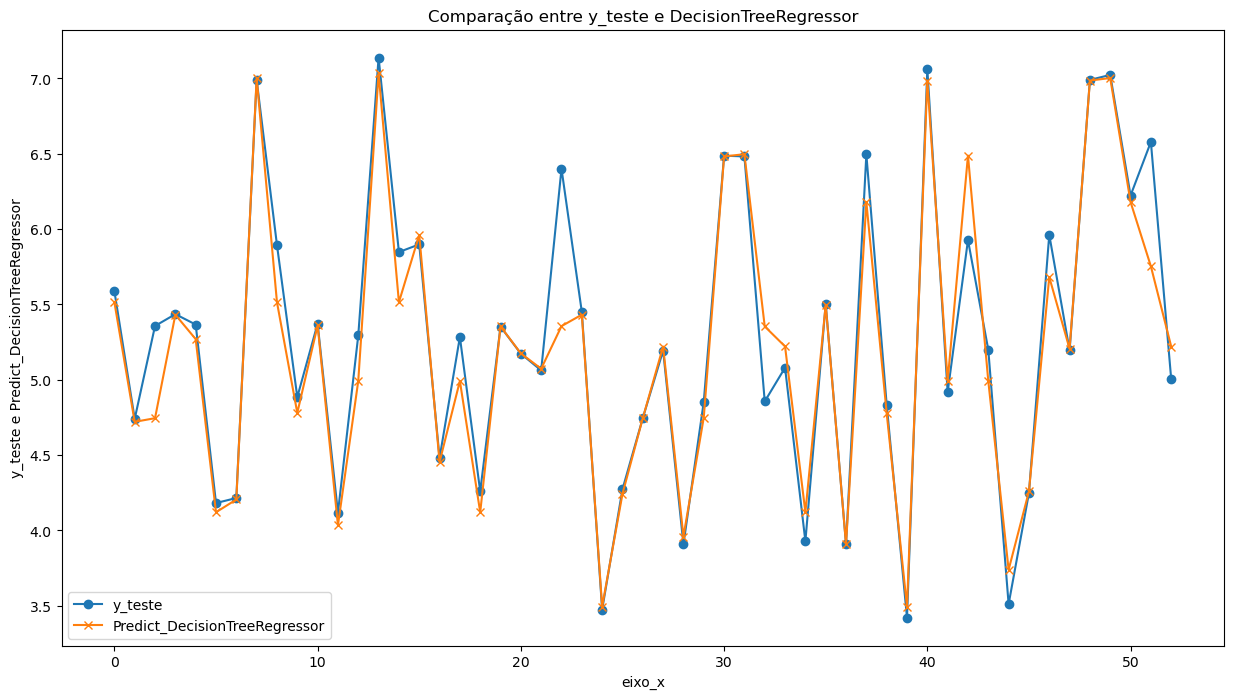

In [19]:
DecisionTreeRegressor = DecisionTreeRegressor()

DecisionTreeRegressor.fit(x_treino, y_treino)

y_DecisionTreeRegressor = DecisionTreeRegressor.predict(x_teste)

# Métricas de regressão
mse = mean_squared_error(y_teste, y_DecisionTreeRegressor)
mae = mean_absolute_error(y_teste, y_DecisionTreeRegressor)
r2 = r2_score(y_teste, y_DecisionTreeRegressor)

print('Mean Squared Error (MSE) =', mse)
print('Mean Absolute Error (MAE) =', mae)
print('R-squared (R2) =', r2)

tabela_DecisionTreeRegressor = pd.DataFrame()
tabela_DecisionTreeRegressor["y_teste"] = y_teste
tabela_DecisionTreeRegressor["Predict_DecisionTreeRegressor"] = y_DecisionTreeRegressor

# Dados fornecidos

y_teste_dtr = tabela_DecisionTreeRegressor["y_teste"]

predict_DecisionTreeRegressor = tabela_DecisionTreeRegressor["Predict_DecisionTreeRegressor"]

# Geração de um array de valores para o eixo x
x_vals = np.arange(len(y_teste))

# Criação do gráfico de linhas
plt.figure(figsize=(15, 8))  # Define o tamanho da figura
plt.plot(x_vals, y_teste_dtr, label='y_teste', marker='o')
plt.plot(x_vals, predict_DecisionTreeRegressor, label='Predict_DecisionTreeRegressor', marker='x')

#plt.xticks(x_vals, y_test)  # Define os rótulos do eixo x como os valores de y_teste
plt.xlabel('eixo_x')  # Rótulo do eixo x
plt.ylabel('y_teste e Predict_DecisionTreeRegressor')  # Rótulo do eixo y
plt.title('Comparação entre y_teste e DecisionTreeRegressor')  # Título do gráfico
plt.legend()  # Adiciona a legenda
#plt.grid(True)  # Adiciona as grades ao gráfico
plt.show()  # Mostra o gráfico


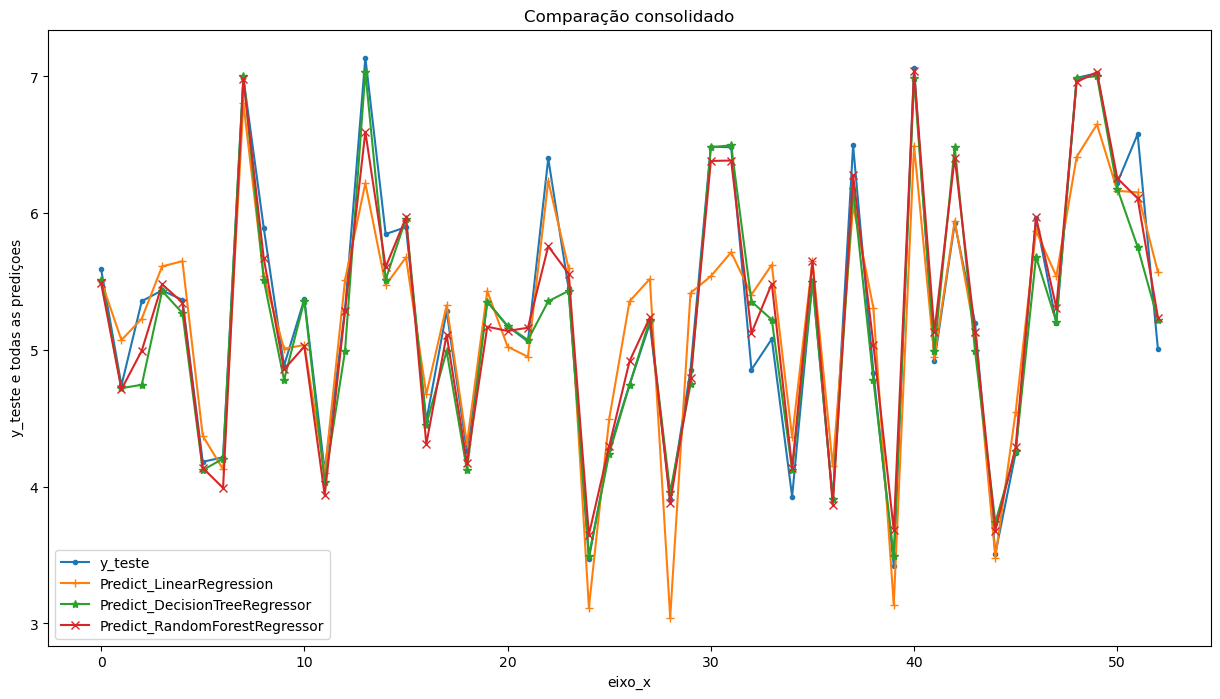

In [20]:
# Geração de um array de valores para o eixo x
x_vals = np.arange(len(y_teste))

# Criação do gráfico de linhas
plt.figure(figsize=(15, 8))  # Define o tamanho da figura

plt.plot(x_vals, y_teste_ln, label='y_teste', marker='.')
plt.plot(x_vals, Predict_LinearRegression, label='Predict_LinearRegression', marker='+')
plt.plot(x_vals, predict_DecisionTreeRegressor, label='Predict_DecisionTreeRegressor', marker='*')
plt.plot(x_vals, Predict_RandomForestRegressor, label='Predict_RandomForestRegressor', marker='x')

#plt.xticks(x_vals, y_test)  # Define os rótulos do eixo x como os valores de y_teste
plt.xlabel('eixo_x')  # Rótulo do eixo x
plt.ylabel('y_teste e todas as prediçoes')  # Rótulo do eixo y
plt.title('Comparação consolidado')  # Título do gráfico
plt.legend()  # Adiciona a legenda
#plt.grid(True)  # Adiciona as grades ao gráfico
plt.show()  # Mostra o gráfico